<a href="https://colab.research.google.com/github/Abhijit-2592/visualizing_cnns/blob/master/activation_maximization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [0]:
np.random.seed(500)

In [0]:
%matplotlib inline

In [5]:
print(tf.__version__)
print(np.__version__)

2.1.0
1.17.5


In [6]:
model = tf.keras.applications.vgg16.VGG16(include_top=True, weights="imagenet")

553467904/553467096 [==============================] - 15s 0us/step


In [7]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [0]:
# trick to get optimal visualizations swap softmax with linear
model.get_layer("predictions").activation = None

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


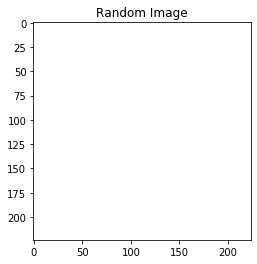

In [9]:
random_image = np.random.random((224, 224, 3)) * 20 + 128
plt.title("Random Image")
plt.imshow(random_image)
plt.show()
random_image = np.expand_dims(random_image, axis=0)  # reshape it to (1,224,224,3)

In [0]:
def get_gradients(model, image, class_index):
    image_tensor = tf.convert_to_tensor(image, dtype="float32")
    with tf.GradientTape() as tape:
        tape.watch(image_tensor)
        output = model(image_tensor)
        loss = tf.reduce_mean(output[:, class_index])
    grads = tape.gradient(loss, image_tensor)
    return grads

# Let's visualize the class Ouzel. It's imagenet index = 20

In [11]:
step_size = 1
epochs = 1000
class_index = 20  # ouzel
progbar = tf.keras.utils.Progbar(epochs)
for i in range(epochs):
    grads = get_gradients(model, random_image, class_index=class_index)
    grads /= (tf.sqrt(tf.reduce_mean(tf.square(grads))) + 1e-5)  # normalization trick
    random_image += grads * step_size   # + is gradient ascent
    progbar.update(i+1)

1000/1000 [==============================] - 68s 68ms/step


In [0]:
def deprocess_image(x):
    """Utility function to convert a tensor into a valid image
    """
    x = np.squeeze(x.numpy(), axis=0)
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1
    x += 0.5
    x = np.clip(x, 0, 1)
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

In [0]:
activation_maximization = deprocess_image(random_image)

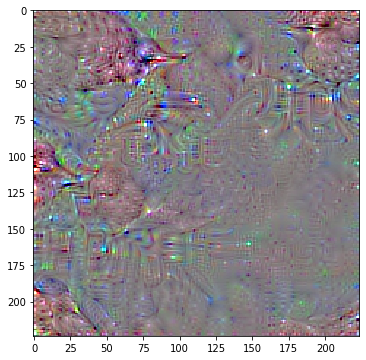

In [14]:
plt.figure(figsize=(6,6))
plt.imshow(activation_maximization)
plt.show()